Dear All, 

Please find the attached data for data preprocessing tasks. Use Pandas to compute statistics from the data, handle missing data and encode the necessary columns to numeric form. Also check if the given dataset is imbalanced. Use appropriate visualizations to display the statistics in the data.

In [97]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
scaler = LabelEncoder()
data = pd.read_csv('heart_disease.csv')
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### Checking for csv information

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319789 non-null  float64
 2   Smoking           319721 non-null  object 
 3   AlcoholDrinking   319680 non-null  object 
 4   Stroke            319774 non-null  object 
 5   PhysicalHealth    319778 non-null  float64
 6   MentalHealth      319781 non-null  float64
 7   DiffWalking       319762 non-null  object 
 8   Sex               319482 non-null  object 
 9   AgeCategory       319751 non-null  object 
 10  Race              319756 non-null  object 
 11  Diabetic          319762 non-null  object 
 12  PhysicalActivity  319779 non-null  object 
 13  GenHealth         319302 non-null  object 
 14  SleepTime         319576 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### Checking for empty fields

In [51]:
data.isna().sum()

HeartDisease          0
BMI                   6
Smoking              74
AlcoholDrinking     115
Stroke               21
PhysicalHealth       17
MentalHealth         14
DiffWalking          33
Sex                 313
AgeCategory          44
Race                 39
Diabetic             33
PhysicalActivity     16
GenHealth           493
SleepTime           219
Asthma                0
KidneyDisease        17
SkinCancer            0
dtype: int64

 ### Filling the missing values of 'BMI' field

In [3]:
data['BMI'].isna().sum() # checking empty entry

6

In [4]:
data['BMI'] = data['BMI'].fillna(25.88) # filling the value

In [6]:
data[data['BMI'] == 25.88] # selecting the filled values

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
7,No,25.88,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,NaN,No
21,No,25.88,No,No,No,2.0,5.0,No,Female,70-74,White,Yes,No,Very good,7.0,No,NaN,No
26,No,25.88,Yes,No,No,21.0,8.0,Yes,Female,65-69,White,No,Yes,Fair,9.0,No,No,No
42,Yes,25.88,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
72,No,25.88,No,No,No,0.0,5.0,No,Male,50-54,White,Yes,Yes,Good,10.0,Yes,No,No
200,No,25.88,No,NaN,No,1.0,30.0,No,Female,45-49,White,No,Yes,Very good,8.0,No,No,Yes


In [7]:
data['BMI'].isna().sum()

0

### Filling missing values in Smoking Field

In [8]:
data['Smoking'].isna().sum() # checking empty fields

74

In [9]:
data['Smoking'] = data['Smoking'].fillna('Yes') # filling the entry

In [12]:
data['Smoking'].isna().sum()

0

In [14]:
data[data['Smoking'] == 'Yes'] # selecting the filled values

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
7,No,25.88,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,NaN,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319782,No,31.89,Yes,No,No,30.0,30.0,Yes,Female,55-59,Hispanic,No,No,Fair,4.0,No,No,No
319784,No,26.58,Yes,No,No,0.0,0.0,Yes,Male,75-79,Hispanic,No,Yes,Good,6.0,No,No,No
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No


### Find the miissing value in AlcoholDrinking field

In [15]:
data['AlcoholDrinking'].isna().sum() # checking the empty entry

115

In [18]:
data['AlcoholDrinking'] = data['AlcoholDrinking'].fillna('Yes') # filling the entry

In [19]:
data['AlcoholDrinking'].isna().sum()

0

In [20]:
data[data['AlcoholDrinking'] == 'Yes']

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
55,No,24.02,No,Yes,No,7.0,0.0,No,Female,60-64,White,No,Yes,Excellent,6.0,No,No,No
96,No,24.02,No,Yes,No,0.0,14.0,No,Female,70-74,White,No,Yes,Very good,7.0,No,No,Yes
97,No,28.35,Yes,Yes,No,20.0,0.0,No,Female,65-69,White,No,No,Very good,8.0,No,No,No
98,No,24.37,No,Yes,No,0.0,0.0,No,Female,55-59,White,No,Yes,Very good,7.0,Yes,No,No
99,No,19.47,Yes,Yes,No,0.0,10.0,No,Female,65-69,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319699,No,27.46,Yes,Yes,No,0.0,0.0,No,Male,70-74,Hispanic,No,Yes,Good,6.0,No,Yes,No
319702,No,24.41,No,Yes,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Good,12.0,No,No,No
319704,No,29.53,No,Yes,No,0.0,4.0,No,Male,25-29,Hispanic,No,Yes,Excellent,7.0,No,No,No
319732,No,18.79,No,Yes,No,30.0,15.0,Yes,Male,55-59,Hispanic,No,No,Fair,6.0,Yes,No,No


### Filling the missing values in Stroke field

In [21]:
data['Stroke'].isna().sum() # checking empty string

21

In [22]:
data['Stroke'] # checking data type

0          No
1         Yes
2          No
3          No
4          No
         ... 
319790     No
319791     No
319792     No
319793     No
319794     No
Name: Stroke, Length: 319795, dtype: object

In [23]:
data['Stroke'].fillna('Yes', inplace = True) # filling the values

In [24]:
data[data['Stroke'] == 'Yes'] # selecting the filled values

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
40,No,22.60,Yes,No,Yes,0.0,10.0,No,Female,55-59,White,No,No,Very good,8.0,No,No,No
49,No,27.46,Yes,No,Yes,15.0,0.0,No,Male,75-79,White,No,Yes,Poor,8.0,No,No,No
59,No,27.20,Yes,No,Yes,0.0,0.0,No,Male,80 or older,White,No,No,Very good,8.0,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319588,No,30.56,No,No,Yes,21.0,2.0,Yes,Male,50-54,Hispanic,Yes,Yes,Good,8.0,No,No,No
319619,Yes,39.31,No,No,Yes,3.0,0.0,Yes,Female,65-69,Hispanic,No,No,Fair,4.0,Yes,Yes,No
319620,Yes,27.64,No,No,Yes,1.0,0.0,Yes,Male,50-54,Hispanic,Yes,Yes,Good,6.0,No,Yes,No
319740,No,26.07,No,No,Yes,0.0,0.0,No,Female,60-64,Hispanic,No,No,Good,6.0,No,No,No


### Filling the missing value in PhsicalHealth field

In [25]:
data['PhysicalHealth'].isna().sum() # cheking empty entry

17

In [26]:
data['PhysicalHealth'].fillna(18.87, inplace = True) # filling the values

In [27]:
data['PhysicalHealth'].isna().sum()

0

In [28]:
data[data['PhysicalHealth'] == 18.87] # selecting the filled values

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
345,No,35.24,Yes,No,No,18.87,0.0,Yes,Female,50-54,White,No,No,Good,6.0,No,No,No
346,Yes,29.04,Yes,No,Yes,18.87,0.0,Yes,Female,65-69,White,Yes,Yes,Poor,8.0,No,Yes,No
347,No,26.43,No,No,Yes,18.87,0.0,No,Female,70-74,Black,Yes,Yes,Good,8.0,No,No,No
348,Yes,27.89,No,No,Yes,18.87,0.0,No,Male,80 or older,White,No,Yes,Very good,8.0,No,No,Yes
349,Yes,26.26,Yes,No,Yes,18.87,0.0,Yes,Male,70-74,White,Yes,No,Good,6.0,No,Yes,No
350,No,27.44,No,No,Yes,18.87,30.0,No,Female,45-49,Black,No,Yes,Very good,4.0,No,No,No
351,No,29.95,Yes,No,Yes,18.87,0.0,Yes,Female,80 or older,White,No,Yes,Good,8.0,No,No,No
352,No,32.28,Yes,No,Yes,18.87,0.0,No,Female,75-79,White,No,No,Good,8.0,No,No,No
353,No,25.84,No,No,Yes,18.87,0.0,No,Male,55-59,White,No,Yes,Very good,7.0,No,No,Yes
354,No,33.99,Yes,No,Yes,18.87,0.0,Yes,Female,55-59,White,No,No,Very good,6.0,No,No,No


### Filling missing values in MentalHealth field

In [30]:
data['MentalHealth'].isna().sum() # checking empty entry

14

In [31]:
data['MentalHealth'].fillna(11.15, inplace = True) # filling the values

In [32]:
data['MentalHealth'].isna().sum()

0

In [33]:
data[data['MentalHealth'] == 11.15] # selecting the filled values

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
686,Yes,55.85,No,No,No,30.0,11.15,No,Male,60-64,White,Yes,No,Fair,6.0,No,No,No
687,No,23.71,No,No,No,0.0,11.15,No,Male,75-79,White,No,Yes,Very good,9.0,No,No,Yes
688,No,26.61,No,No,Yes,0.0,11.15,Yes,Female,80 or older,White,Yes,Yes,Good,6.0,Yes,Yes,No
689,No,32.11,Yes,No,No,30.0,11.15,Yes,Female,75-79,White,No,No,Poor,6.0,Yes,No,No
690,No,29.95,Yes,No,No,0.0,11.15,No,Female,75-79,White,No,Yes,Very good,7.0,No,No,No
691,No,23.49,Yes,No,No,0.0,11.15,No,Female,40-44,White,No,Yes,Very good,8.0,Yes,No,No
692,No,20.61,No,No,No,10.0,11.15,No,Male,50-54,White,No,Yes,Very good,9.0,No,No,No
693,No,31.75,No,No,No,0.0,11.15,No,Female,80 or older,White,No,No,Very good,9.0,No,No,No
694,No,26.97,Yes,No,No,0.0,11.15,No,Male,65-69,White,No,Yes,Good,8.0,No,No,No
695,No,28.17,No,No,No,0.0,11.15,No,Female,80 or older,White,No,Yes,Good,6.0,Yes,No,No


### Filling the missing values in Diffwwalking field

In [34]:
data['DiffWalking'].isna().sum() # checking empty entry

33

In [36]:
data['DiffWalking'].fillna('Yes', inplace = True) # filling the values

In [37]:
data['DiffWalking'].isna().sum()

0

In [38]:
data[data['DiffWalking'] == 'Yes'] # selecting filled values

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
7,No,25.88,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,NaN,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,NaN,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319777,No,42.57,No,No,No,0.0,0.0,Yes,Female,60-64,Hispanic,No,No,Good,7.0,No,No,No
319779,No,23.38,Yes,No,No,30.0,0.0,Yes,Female,70-74,Hispanic,No,Yes,Fair,5.0,No,No,No
319782,No,31.89,Yes,No,No,30.0,30.0,Yes,Female,55-59,Hispanic,No,No,Fair,4.0,No,No,No
319784,No,26.58,Yes,No,No,0.0,0.0,Yes,Male,75-79,Hispanic,No,Yes,Good,6.0,No,No,No


### Filling missing values in sex field

In [39]:
data['Sex'].isna().sum() # checking empty entry

313

In [40]:
data['Sex'].fillna('Male', inplace = True) # filling the values

In [41]:
data['Sex'].isna().sum()

0

In [42]:
data[data['Sex'] == 'Male'] # selecting the values

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,NaN,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,NaN,No
12,No,28.37,Yes,No,No,0.0,0.0,Yes,Male,75-79,White,Yes,Yes,Very good,8.0,No,NaN,No
17,No,22.59,Yes,No,No,0.0,30.0,Yes,Male,70-74,White,"No, borderline diabetes",Yes,Good,8.0,No,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319784,No,26.58,Yes,No,No,0.0,0.0,Yes,Male,75-79,Hispanic,No,Yes,Good,6.0,No,No,No
319785,No,31.93,No,Yes,No,0.0,0.0,No,Male,65-69,Hispanic,No,Yes,Good,7.0,No,No,No
319787,No,36.54,No,No,No,7.0,0.0,No,Male,30-34,Hispanic,No,No,Good,9.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No


 ### Filling missing value in AgeCategory field

In [52]:
data['AgeCategory'].isna().sum() # checking empty entry

44

In [53]:
data['AgeCategory'] # checking datatypes

0               55-59
1         80 or older
2               65-69
3               75-79
4               40-44
             ...     
319790          60-64
319791          35-39
319792          45-49
319793          25-29
319794    80 or older
Name: AgeCategory, Length: 319795, dtype: object

In [54]:
data['AgeCategory'].fillna('70-75', inplace = True) # filling missing values

In [55]:
data[data['AgeCategory'] == '70-75' ] # selecting values

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1034,No,39.32,No,No,No,7.0,0.0,Yes,NaN,70-75,NaN,NaN,No,Fair,6.0,No,Yes,No
1035,Yes,19.64,No,No,No,1.0,4.0,No,NaN,70-75,NaN,NaN,Yes,Good,7.0,No,No,No
1036,No,35.71,No,No,No,0.0,20.0,No,NaN,70-75,NaN,NaN,No,Very good,6.0,No,No,No
1037,No,37.25,Yes,No,No,5.0,4.0,No,NaN,70-75,NaN,Yes,Yes,Good,8.0,Yes,No,No
1038,No,28.90,No,No,Yes,0.0,0.0,No,NaN,70-75,NaN,No,Yes,Good,8.0,No,No,No
1039,No,32.08,No,No,No,0.0,0.0,No,NaN,70-75,NaN,Yes,Yes,Very good,8.0,Yes,No,No
1040,No,35.40,Yes,No,No,14.0,3.0,Yes,NaN,70-75,NaN,Yes,Yes,Fair,6.0,No,No,Yes
1041,No,28.52,Yes,No,No,20.0,4.0,Yes,NaN,70-75,NaN,No,No,Fair,6.0,No,No,No
1042,No,21.62,Yes,No,No,0.0,0.0,No,NaN,70-75,NaN,"No, borderline diabetes",No,Very good,8.0,No,No,No
1043,No,22.85,No,No,No,0.0,2.0,No,NaN,70-75,NaN,No,No,Good,7.0,No,No,No


### Filling missing value in Race field

In [57]:
data['Race'].isna().sum() # checking empty entry

39

In [58]:
data['Race'].unique() # selecting unique values

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic', nan], dtype=object)

In [59]:
data['Race'].fillna('Bhotey', inplace = True) # filling values

In [60]:
data['Race'].isna().sum()

0

In [61]:
data[data['Race'] == 'Bhotey']

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1024,No,26.45,Yes,No,No,5.0,0.0,No,NaN,80 or older,Bhotey,NaN,Yes,Very good,7.0,No,No,No
1025,No,38.41,Yes,No,Yes,15.0,30.0,Yes,NaN,50-54,Bhotey,NaN,Yes,Fair,7.0,No,Yes,Yes
1026,No,25.29,Yes,No,Yes,0.0,0.0,No,NaN,75-79,Bhotey,NaN,Yes,Poor,8.0,No,Yes,Yes
1027,No,28.70,No,No,No,30.0,0.0,Yes,NaN,80 or older,Bhotey,NaN,No,Good,8.0,No,No,No
1028,Yes,27.93,No,No,Yes,2.0,0.0,Yes,NaN,80 or older,Bhotey,NaN,No,Good,7.0,No,No,Yes
1029,No,21.93,Yes,No,No,30.0,0.0,No,NaN,80 or older,Bhotey,NaN,No,Poor,6.0,No,No,No
1030,No,29.12,Yes,No,No,0.0,0.0,Yes,NaN,80 or older,Bhotey,NaN,No,Very good,8.0,No,No,No
1031,No,36.90,Yes,No,No,5.0,5.0,No,NaN,65-69,Bhotey,NaN,No,Fair,7.0,No,No,No
1032,No,22.15,Yes,No,No,0.0,0.0,No,NaN,80 or older,Bhotey,NaN,No,Fair,6.0,No,No,Yes
1033,No,31.46,Yes,No,No,10.0,1.0,Yes,NaN,65-69,Bhotey,NaN,Yes,Fair,5.0,No,No,No


### Filling missing values in Diabetic field

In [62]:
data['Diabetic'].isna().sum() # checking empty entry

33

In [63]:
data['Diabetic'].unique() # selecting unique values

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)',
       nan], dtype=object)

In [64]:
data['Diabetic'].fillna('Yes, consuming sweets', inplace = True) # filling values

In [65]:
data['Diabetic'].isna().sum()

0

In [66]:
data[data['Diabetic'] == 'Yes, consuming sweets'] # selecting filled values

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1004,Yes,23.71,No,No,No,0.0,0.0,No,NaN,70-74,White,"Yes, consuming sweets",Yes,Very good,9.0,No,No,No
1005,No,29.76,Yes,No,No,30.0,15.0,Yes,NaN,75-79,White,"Yes, consuming sweets",No,Fair,8.0,No,No,Yes
1006,No,40.90,No,No,No,30.0,0.0,Yes,NaN,55-59,White,"Yes, consuming sweets",Yes,Good,10.0,No,No,No
1007,No,23.49,No,No,No,0.0,0.0,Yes,NaN,70-74,White,"Yes, consuming sweets",Yes,Excellent,6.0,No,No,No
1008,No,24.02,No,No,No,0.0,0.0,No,NaN,80 or older,White,"Yes, consuming sweets",Yes,Excellent,7.0,No,No,No
1009,No,46.06,Yes,No,No,30.0,15.0,Yes,NaN,65-69,White,"Yes, consuming sweets",No,Fair,8.0,No,No,No
1010,No,37.76,Yes,No,No,0.0,0.0,No,NaN,50-54,White,"Yes, consuming sweets",No,Very good,7.0,No,No,No
1011,No,21.59,Yes,No,No,0.0,20.0,No,NaN,50-54,Black,"Yes, consuming sweets",No,Good,4.0,No,No,No
1012,No,27.99,No,No,No,20.0,0.0,Yes,NaN,55-59,Black,"Yes, consuming sweets",Yes,Fair,7.0,No,No,No
1013,No,32.14,Yes,No,No,0.0,0.0,No,NaN,60-64,White,"Yes, consuming sweets",Yes,Excellent,8.0,No,No,Yes


### Filling missing values in PhysicalActivity field

In [68]:
data['PhysicalActivity'].isna().sum() # checking empty entry

16

In [70]:
data['PhysicalActivity'].unique() # selecting unique values

array(['Yes', 'No', nan], dtype=object)

In [71]:
data['PhysicalActivity'].fillna('No', inplace= True) # filling values

In [72]:
data['PhysicalActivity'].isna().sum()

0

In [73]:
data[data['PhysicalActivity'] == 'No'] # selecting filledd values

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
7,No,NaN,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,NaN,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,NaN,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319778,No,26.63,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Very good,8.0,No,No,No
319782,No,31.89,Yes,No,No,30.0,30.0,Yes,Female,55-59,Hispanic,No,No,Fair,4.0,No,No,No
319787,No,36.54,No,No,No,7.0,0.0,No,Male,30-34,Hispanic,No,No,Good,9.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No


### Filling the missing value in GenHealth field

In [74]:
data['GenHealth'].isna().sum() # checking empty entry

493

In [75]:
data['GenHealth'].unique() # checking unique values

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent', nan],
      dtype=object)

In [76]:
data['GenHealth'].fillna('Deteorated', inplace = True) # filling values

In [77]:
data['GenHealth'].isna().sum()

0

In [78]:
data[data['GenHealth'] == 'Deteorated']# filled values

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
252308,No,20.98,No,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Deteorated,8.0,No,No,No
252309,No,21.63,No,No,No,3.0,0.0,No,Female,80 or older,White,No,Yes,Deteorated,8.0,No,No,Yes
252310,Yes,34.46,No,No,No,0.0,0.0,No,Male,70-74,White,No,Yes,Deteorated,7.0,No,No,No
252311,No,26.54,No,No,No,0.0,0.0,No,Male,70-74,White,No,No,Deteorated,10.0,No,No,No
252312,No,26.63,No,No,No,2.0,8.0,No,Female,18-24,White,No,No,Deteorated,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252796,No,21.95,Yes,No,No,0.0,0.0,No,Female,70-74,White,Yes,No,Deteorated,8.0,No,No,No
252797,No,28.19,Yes,No,No,14.0,2.0,No,Female,60-64,American Indian/Alaskan Native,No,No,Deteorated,4.0,No,No,No
252798,No,32.55,No,No,No,0.0,0.0,No,Male,18-24,White,No,Yes,Deteorated,6.0,Yes,No,No
252799,No,21.97,Yes,No,No,0.0,2.0,No,Female,30-34,American Indian/Alaskan Native,No,Yes,Deteorated,8.0,Yes,No,No


### Filling missing values in sleeptime field

In [79]:
data['SleepTime'].isna().sum() # checking empty entry

219

In [80]:
data['SleepTime'].unique() # selecting unique values

array([ 5.,  7.,  8.,  6., 12.,  4.,  9., 10., 15.,  3.,  2.,  1., 16.,
       18., 14., 20., 11., 13., 17., 24., 19., 21., 22., 23., nan])

In [81]:
data['SleepTime'].fillna( 8.80, inplace = True) # filling values

In [82]:
data['SleepTime'].isna().sum()

0

In [83]:
data[data['SleepTime'] == 8.80] # selecting filled values

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
252291,No,25.75,Yes,No,No,0.0,0.0,No,Female,65-69,White,No,Yes,Excellent,8.8,No,No,No
252292,No,26.83,Yes,No,No,0.0,0.0,No,Female,45-49,American Indian/Alaskan Native,Yes,No,Good,8.8,No,Yes,No
252293,No,18.55,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,8.8,No,No,No
252294,No,36.58,Yes,No,No,0.0,20.0,No,Female,30-34,American Indian/Alaskan Native,Yes,Yes,Good,8.8,No,No,No
252295,No,32.32,No,No,No,2.0,0.0,No,Female,80 or older,White,No,No,Good,8.8,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253301,No,36.92,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Very good,8.8,No,No,No
253302,No,34.33,No,No,No,0.0,2.0,No,Female,45-49,White,No,Yes,Very good,8.8,No,No,No
253303,No,22.81,No,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Very good,8.8,No,No,No
253304,No,25.10,No,No,No,0.0,0.0,No,Male,50-54,White,No,Yes,Very good,8.8,No,No,No


### Filling missing values in Asthma fields


In [84]:
data['Asthma'].isna().sum() # checking empty entry

0

### Filling missing variable in KidneyDisease field

In [85]:
data['KidneyDisease'].isna().sum() # checking empty entry

17

In [86]:
data['KidneyDisease'].unique() # selecting unique values

array(['No', nan, 'Yes'], dtype=object)

In [87]:
data['KidneyDisease'].fillna('Yes', inplace = True ) # filling values

In [88]:
data['KidneyDisease'].isna().sum()

0

In [89]:
data[data['KidneyDisease'] == 'Yes'] # selecting filled values

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
7,No,NaN,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,Yes,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,Yes,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,Yes,No
11,No,28.71,Yes,No,No,0.0,0.0,No,Female,55-59,White,No,Yes,Very good,5.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319735,No,31.44,No,No,No,10.0,0.0,No,Female,75-79,Hispanic,No,Yes,Fair,5.0,No,Yes,No
319738,No,37.59,Yes,No,No,0.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,8.0,No,Yes,No
319739,Yes,35.02,No,No,No,15.0,0.0,No,Male,60-64,Hispanic,Yes,Yes,Fair,8.0,No,Yes,No
319745,No,22.83,No,No,No,3.0,0.0,Yes,Female,70-74,Hispanic,Yes,No,Fair,8.0,Yes,Yes,No


### Filling missing values in SKinCancer field

In [90]:
data['SkinCancer'].isna().sum() # checking empty entry

0

## Encoding all the fields

##  BMI

In [98]:
data['BMI_enc'] = scaler.fit_transform(data['BMI'])
data[['BMI_enc', 'BMI']]

,BMI_enc,BMI
0,223,16.60
1,524,20.34
2,1103,26.58
3,883,24.21
4,837,23.71
...,...,...
319790,1180,27.41
319791,1397,29.84
319792,886,24.24
319793,1658,32.81


### AlcoholDrinking

In [100]:
data['AlcoholDrinking_enc'] = scaler.fit_transform(data['AlcoholDrinking'])
data[['AlcoholDrinking_enc','AlcoholDrinking']]

,AlcoholDrinking_enc,AlcoholDrinking
0,0,No
1,0,No
2,0,No
3,0,No
4,0,No
...,...,...
319790,0,No
319791,0,No
319792,0,No
319793,0,No


### MentalHealth

In [101]:
data['MentalHealth_enc'] = scaler.fit_transform(data['MentalHealth'])
data[['MentalHealth_enc', 'MentalHealth']]

,MentalHealth_enc,MentalHealth
0,30,30.0
1,0,0.0
2,30,30.0
3,0,0.0
4,0,0.0
...,...,...
319790,0,0.0
319791,0,0.0
319792,0,0.0
319793,0,0.0


### Race

In [102]:
data['Race_enc'] = scaler.fit_transform(data['Race'])
data[['Race_enc', 'Race']]

,Race_enc,Race
0,5,White
1,5,White
2,5,White
3,5,White
4,5,White
...,...,...
319790,3,Hispanic
319791,3,Hispanic
319792,3,Hispanic
319793,3,Hispanic


### `GenHealth

In [103]:
data['GenHealth_enc'] = scaler.fit_transform(data['GenHealth'])
data[['GenHealth_enc', 'GenHealth']]

,GenHealth_enc,GenHealth
0,4,Very good
1,4,Very good
2,1,Fair
3,2,Good
4,4,Very good
...,...,...
319790,1,Fair
319791,4,Very good
319792,2,Good
319793,2,Good


### Visualization

In [105]:
x = data['PhysicalHealth']

In [106]:
y = data['MentalHealth']

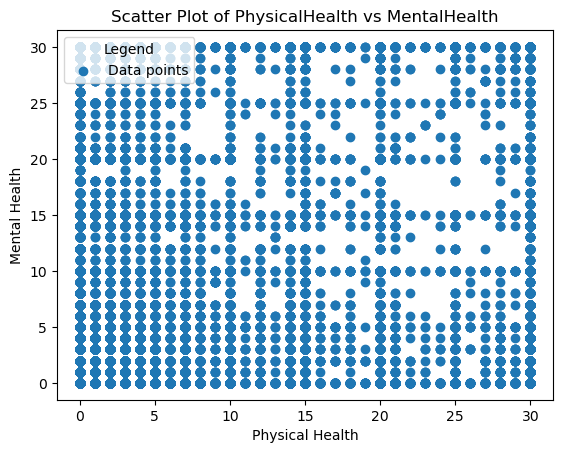

In [107]:
plt.scatter(x, y, label='Data points')  # Add label for legend
plt.title("Scatter Plot of PhysicalHealth vs MentalHealth")
plt.xlabel("Physical Health")
plt.ylabel("Mental Health")
plt.legend(title="Legend", loc='upper left')
plt.show()

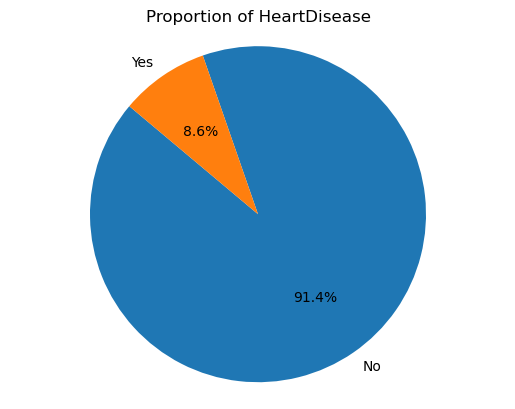

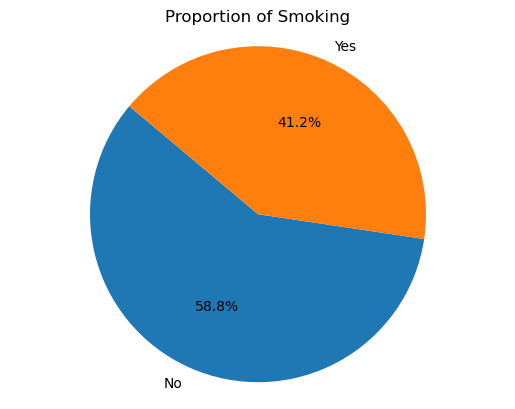

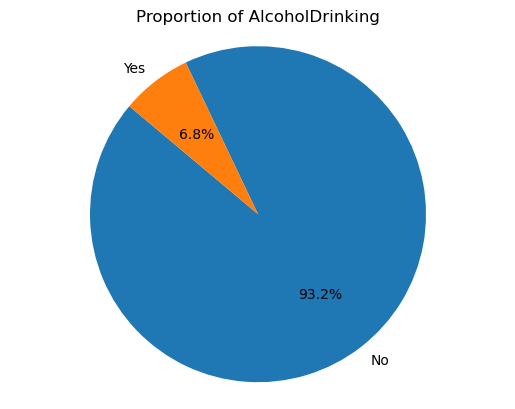

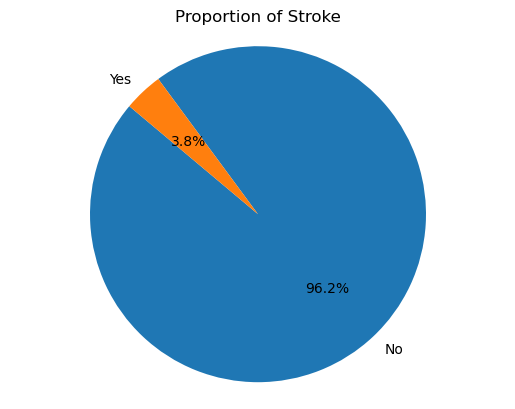

In [108]:
# Define the categorical columns for which you want to create pie charts
categorical_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke']

# Create pie charts for each categorical column
for column in categorical_columns:
    # Count the occurrences of each category
    counts = data[column].value_counts()
    
    # Create a pie chart
    plt.figure()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Proportion of {column}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [109]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_enc,AlcoholDrinking_enc,MentalHealth_enc,Race_enc,GenHealth_enc
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,Very good,5.0,Yes,No,Yes,223,0,30,5,4
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,Very good,7.0,No,No,No,524,0,0,5,4
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,Fair,8.0,Yes,No,No,1103,0,30,5,1
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,Good,6.0,No,No,Yes,883,0,0,5,2
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,Very good,8.0,No,No,No,837,0,0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,...,Fair,6.0,Yes,No,No,1180,0,0,3,1
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,...,Very good,5.0,Yes,No,No,1397,0,0,3,4
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,...,Good,6.0,No,No,No,886,0,0,3,2
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,...,Good,12.0,No,No,No,1658,0,0,3,2


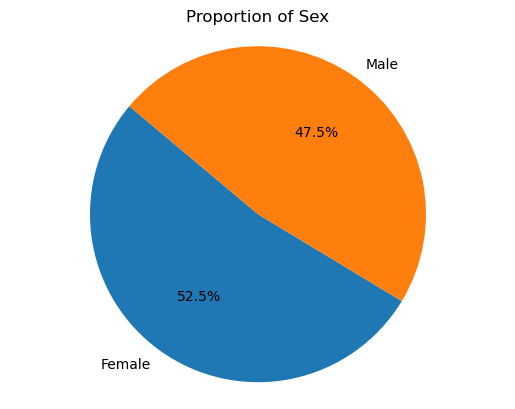

In [111]:
# Count the occurrences of each category in the 'Sex' column
sex_counts = data['Sex'].value_counts()

# Create a pie chart
plt.figure()
plt.pie(sex_counts, labels = sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Sex")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [112]:
data_info = data.describe()
data_info

,BMI,PhysicalHealth,MentalHealth,SleepTime,BMI_enc,AlcoholDrinking_enc,MentalHealth_enc,Race_enc,GenHealth_enc
count,319789.000000,319778.000000,319781.000000,319576.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325348,3.371605,3.898384,7.096922,1242.182314,0.068800,3.899570,4.397014,2.224828
std,6.356134,7.950662,7.955291,1.436165,533.059095,0.254531,7.957137,1.212208,1.537434
min,12.020000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.030000,0.000000,0.000000,6.000000,866.000000,0.000000,0.000000,5.000000,1.000000
50%,27.340000,0.000000,0.000000,7.000000,1173.000000,0.000000,0.000000,5.000000,2.000000
75%,31.420000,2.000000,3.000000,8.000000,1539.000000,0.000000,3.000000,5.000000,4.000000
max,94.850000,30.000000,30.000000,24.000000,3604.000000,2.000000,31.000000,6.000000,5.000000


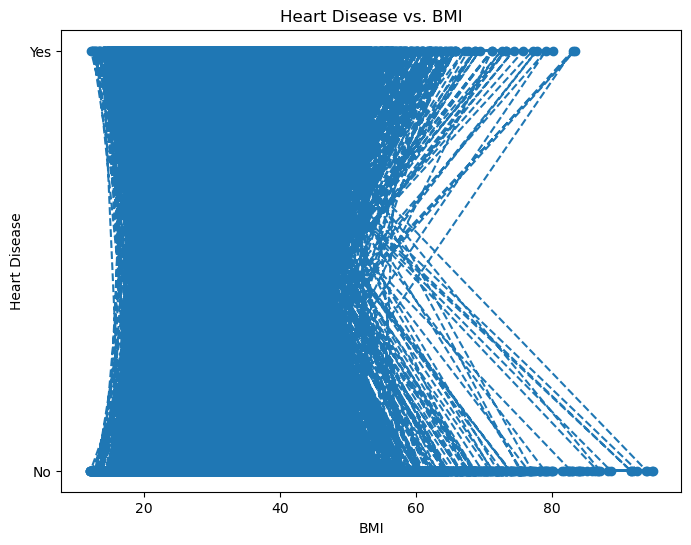

In [113]:
# Line plot: HeartDisease vs. BMI
plt.figure(figsize=(8, 6))
plt.plot(data['BMI'], data['HeartDisease'], marker='o', linestyle='--')
plt.xlabel('BMI')
plt.ylabel('Heart Disease')
plt.title('Heart Disease vs. BMI')
plt.show()

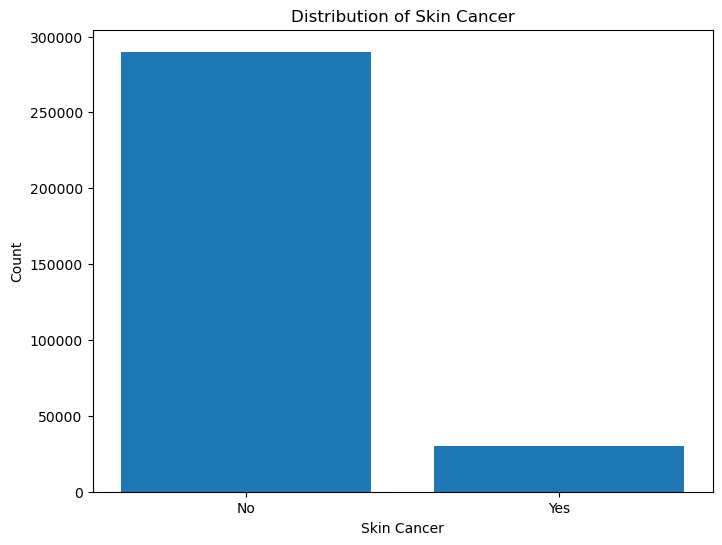

In [114]:
# Bar plot: Count of individuals with different SkinCancer values
plt.figure(figsize=(8, 6))
skin_cancer_counts = data['SkinCancer'].value_counts()
plt.bar(skin_cancer_counts.index, skin_cancer_counts.values)
plt.xlabel('Skin Cancer')
plt.ylabel('Count')
plt.title('Distribution of Skin Cancer')
plt.show()

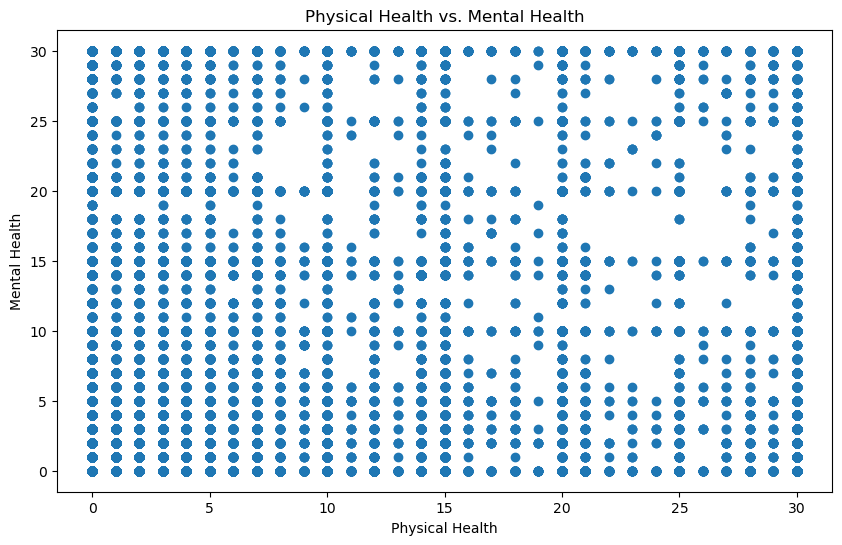

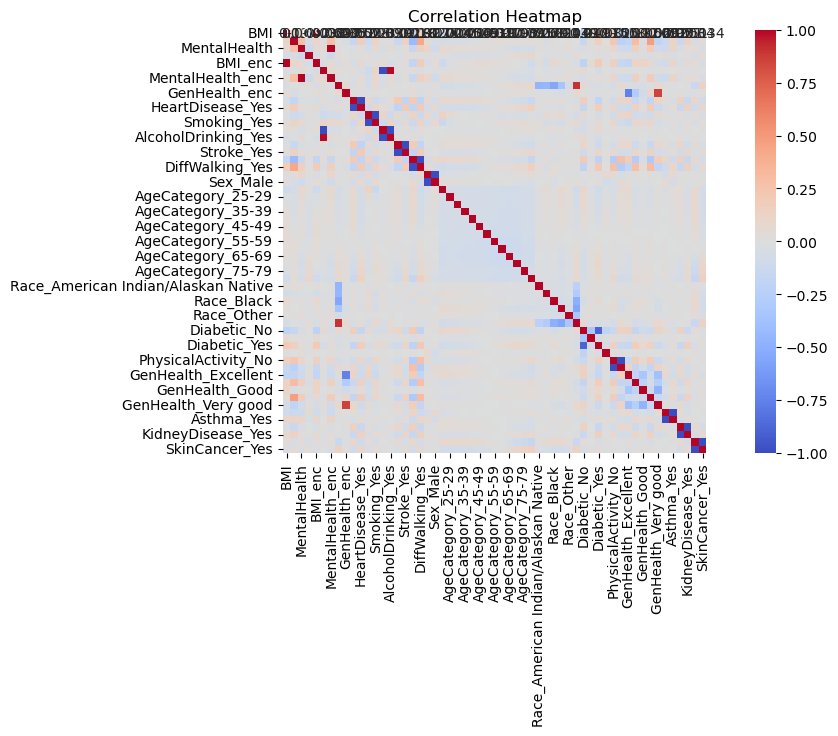

In [115]:
# Create a copy of the DataFrame to preserve the original data
encoded_df = data.copy()

# Identify the categorical columns
categorical_cols = encoded_df.select_dtypes(include=['object']).columns

# One-hot encode the categorical columns
encoded_df = pd.get_dummies(encoded_df, columns=categorical_cols)

# Scatter plot: Physical Health vs. Mental Health
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df['PhysicalHealth'], encoded_df['MentalHealth'])
plt.xlabel('Physical Health')
plt.ylabel('Mental Health')
plt.title('Physical Health vs. Mental Health')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = encoded_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.tight_layout(pad=3.0)# Adjust the layout to prevent overlapping
plt.subplots_adjust(hspace=0.5, wspace=0.9)
  
plt.show()